In [25]:
import matplotlib.pyplot as plt
import librosa
import os
import torch
import torchvision
import numpy as np
from dataset import SpectrogramDataset

### Waveform and spectrogram

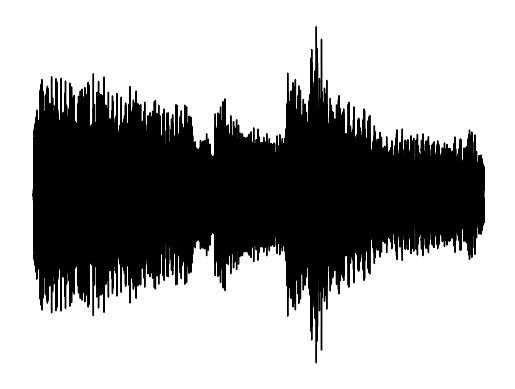

In [24]:
audiofile = 'datasets/randomMIDI/PianoViolin11025/WAV/test/mix/song0003.wav'
waveform, sr = librosa.load(audiofile, sr=11025)
spectrogram = librosa.stft(waveform, n_fft=511, hop_length=128)
spectrogram = torch.from_numpy(librosa.amplitude_to_db(np.abs(spectrogram), ref=1e-5)/255)
spectrogram = spectrogram[:256, :256]
spectrogram = spectrogram.unsqueeze(0).repeat(3, 1, 1)


os.makedirs('figures', exist_ok=True)
torchvision.utils.save_image(spectrogram, 'figures/spectrogram.png')

plt.figure()
librosa.display.waveshow(waveform[:32641], sr=11025, color='black')
plt.axis('off')
plt.savefig('figures/waveform.png')

### Diffusion process

In [ ]:
test_ds=SpectrogramDataset(target_dir='datasets/randomMIDI/PianoViolin11025/WAV/test/ins3',
                           condition_dir='datasets/randomMIDI/PianoViolin11025/WAV/test/mix',
                           return_pair=True
                     )